In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

<h2>Define Hyper-parameters</h2>

In [2]:
num_steps = 10000
n_hidden = 2
lr = 0.1

<h2>Define your input data and expected labels</h2>

In [3]:
x = np.array([[0,0],[0,1],[1,0],[1,1]],np.float32)
y = np.array([0,1,1,0],np.float32)
y = np.reshape(y,[4,1])

<h2>Define placeholder and Variables</h2>

In [4]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32,shape=[4,2],name='X')
Y = tf.placeholder(tf.float32,shape=[4,1],name='Y')
weights = {
    'W': tf.Variable(tf.random_normal([2, n_hidden]),name='W'),
    'Wout': tf.Variable(tf.random_normal([n_hidden, 1]),name='Wout')
}

biases = {
    'b': tf.Variable(tf.zeros(shape=[n_hidden]),name='b'),
    'bout': tf.Variable(tf.zeros(shape=[1]),name='bout')
}

Instructions for updating:
Colocations handled automatically by placer.


<h2>Define the neural network</h2>

In [5]:
def neural_net(x):
    layer_out = tf.add(tf.matmul(x,weights['W']),biases['b'])
    layer_out = tf.sigmoid(layer_out)
    out = tf.add(tf.matmul(layer_out,weights['Wout']),biases['bout'])
    return out

<h2>Define cost function</h2>

In [6]:
logits = neural_net(X)
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y),name='loss')
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss)
logits = tf.round(tf.sigmoid(logits))
correct_pred = tf.equal(logits,Y)
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')
init = tf.global_variables_initializer()

<h2>Execute training</h2>

In [7]:
acc = np.zeros(num_steps)

with tf.Session() as sess:
    sess.run(init) 
    for i in range(num_steps):
        sess.run(train_op, feed_dict={X:x, Y:y})
        acc[i] = sess.run(accuracy,feed_dict={X:x, Y:y})
    
    print("Training finished!")
    print("Accuracy:", sess.run(accuracy, feed_dict={X:x, Y:y}))
    
    outcome = np.squeeze(sess.run(logits, feed_dict={X:x, Y:y}))
    W = np.squeeze(sess.run(weights['W']))
    b = np.squeeze(sess.run(biases['b']))
    
    for j in range(4):
        print("Input state:", x[j], " Outcome:", outcome[j] )

Training finished!
Accuracy: 1.0
Input state: [0. 0.]  Outcome: 0.0
Input state: [0. 1.]  Outcome: 1.0
Input state: [1. 0.]  Outcome: 1.0
Input state: [1. 1.]  Outcome: 0.0


<h2>Plot</h2>

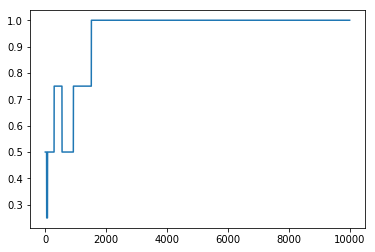

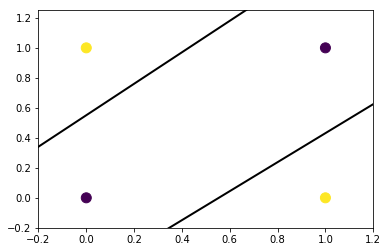

In [8]:
plt.plot(range(len(acc)),acc)
plt.show()
plot_x = np.array([np.min(x[:, 0] - 0.2), np.max(x[:, 1]+0.2)])
plot_y_1 = 1 / W[1][0] * (-W[0][0] * plot_x - b[0])
plot_y_2 = 1 / W[1][1] * (-W[0][1] * plot_x - b[1])
plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(y), s=100, cmap='viridis')
plt.plot(plot_x, plot_y_1, color='k', linewidth=2)
plt.plot(plot_x, plot_y_2, color='k', linewidth=2)
plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
plt.show()

I didn't use batch, so every iteration is a epoch.